In [1]:
# 패키지 수입
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Flatten, Dense

In [2]:
# 하이퍼 패러미터 설정
MY_BATCH = 100
MY_EPOCH = 50

In [3]:
# 0. 데이터 불러오기
digits = load_digits()
X = digits.data
Y = digits.target

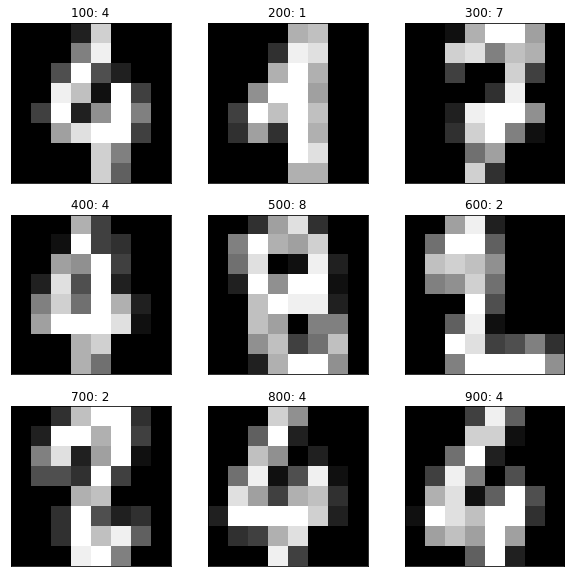

In [4]:
# 1. 샘플 데이터 시각화
sample_num = 100

fig, ax = plt.subplots(3, 3, figsize=(10, 10))

for row in range(3):
    for col in range(3):
        sub = ax[row, col]
        sub.imshow(X[sample_num].reshape(8, 8), cmap="gray")

        sub.set_title(str(sample_num) + ": " + str(Y[sample_num]))
        sub.set_xticks([])
        sub.set_yticks([])

        sample_num += 100

plt.show()

In [5]:
# 2. 입력 데이터 차원 수 재구성
X = X.reshape(X.shape[0], 8, 8, 1)

In [6]:
# 3. 입력 데이터 스케일링
X = X / 255.0

In [7]:
# 4. 출력 데이터 원-핫 인코딩
Y = to_categorical(Y, 10)

In [8]:
# 5. 학습용, 평가용 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=43)

In [9]:
# 6. 인공신경망 구축
model = Sequential()

model.add(InputLayer(input_shape=(8, 8, 1)))

model.add(Conv2D(12, kernel_size=(4, 4), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), padding="same"))

model.add(Conv2D(24, kernel_size=(4, 4), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), padding="same"))

model.add(Flatten())
model.add(Dense(2000, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 12)          204       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 12)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 24)          4632      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 24)          0         
_________________________________________________________________
flatten (Flatten)            (None, 96)                0         
_________________________________________________________________
dense (Dense)                (None, 2000)              194000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [10]:
# 7. 기타 환경 설정
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

In [11]:
# 8. 학습 진행
hist = model.fit(X_train, Y_train, batch_size=MY_BATCH, epochs=MY_EPOCH, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/50
14/14 [==============================] - 0s 13ms/step - loss: 2.2966 - acc: 0.1054 - val_loss: 2.2904 - val_acc: 0.0689
Epoch 2/50
14/14 [==============================] - 0s 4ms/step - loss: 2.2580 - acc: 0.1990 - val_loss: 2.2336 - val_acc: 0.2289
Epoch 3/50
14/14 [==============================] - 0s 4ms/step - loss: 2.1488 - acc: 0.3289 - val_loss: 2.0477 - val_acc: 0.4111
Epoch 4/50
14/14 [==============================] - 0s 4ms/step - loss: 1.8718 - acc: 0.5457 - val_loss: 1.6672 - val_acc: 0.5911
Epoch 5/50
14/14 [==============================] - 0s 4ms/step - loss: 1.4289 - acc: 0.6540 - val_loss: 1.2255 - val_acc: 0.6400
Epoch 6/50
14/14 [==============================] - 0s 4ms/step - loss: 1.0586 - acc: 0.6986 - val_loss: 0.9460 - val_acc: 0.7178
Epoch 7/50
14/14 [==============================] - 0s 4ms/step - loss: 0.8508 - acc: 0.7595 - val_loss: 0.7990 - val_acc: 0.7711
Epoch 8/50
14/14 [==============================] - 0s 4ms/step - loss: 0.7099 - acc: 0.8

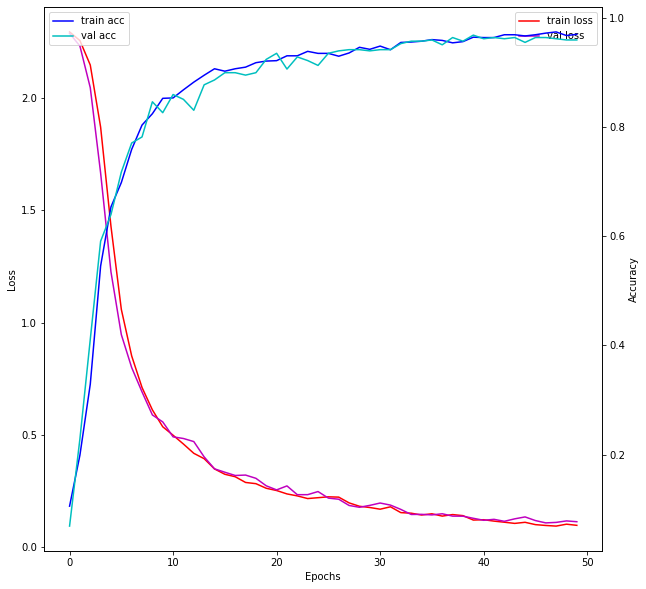

In [12]:
# 9. 학습 내역 시각화
fig, loss_ax = plt.subplots(figsize=(10, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history["loss"], "r", label="train loss")
loss_ax.plot(hist.history["val_loss"], "m", label="val loss")

acc_ax.plot(hist.history["acc"], "b", label="train acc")
acc_ax.plot(hist.history["val_acc"], "c", label="val acc")

loss_ax.set_xlabel("Epochs")
loss_ax.set_ylabel("Loss")
acc_ax.set_ylabel("Accuracy")

loss_ax.legend()
acc_ax.legend()

plt.show()

In [13]:
# 10. 평가 진행
loss, acc = model.evaluate(X_test, Y_test, batch_size=MY_BATCH, verbose=1)
print("Test loss:", loss)
print("Test accuracy:", acc)

5/5 [==============================] - 0s 1ms/step - loss: 0.1112 - acc: 0.9600
Test loss: 0.11115242540836334
Test accuracy: 0.9599999785423279


In [14]:
# 11. 예측 데이터 생성
Y_pred = model.predict(X_test, batch_size=MY_BATCH, verbose=1)

5/5 [==============================] - 0s 998us/step


In [15]:
# 12. 원-핫 인코딩 되돌리기
Y_test = np.argmax(Y_test, axis=1)
Y_pred = np.argmax(Y_pred, axis=1)

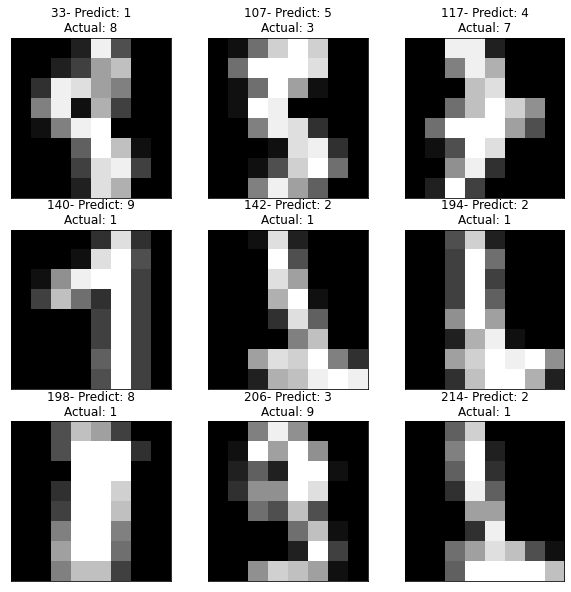

In [16]:
# 13. 틀린 예측 데이터 시각화
row = 3
col = 3

fig, ax = plt.subplots(row, col, figsize=(10, 10))

i = 0
cnt = 0

while cnt < (row * col):
    if Y_test[i] == Y_pred[i]:
        i += 1
        continue

    sub = ax[int(cnt/row), int(cnt%col)]
    sub.imshow(X_test[i].reshape(8, 8), cmap="gray")

    title = str(i) + "- Predict: " + str(Y_pred[i]) + "\nActual: " + str(Y_test[i]) 
    sub.set_title(title)
    sub.set_xticks([])
    sub.set_yticks([])

    i += 1
    cnt += 1

plt.show()

In [17]:
# 14. 혼동 행렬 생성
cm = confusion_matrix(Y_test, Y_pred)
cm = pd.DataFrame(cm)
display(cm)

,0,1,2,3,4,5,6,7,8,9
0,51,0,0,0,0,0,0,0,0,0
1,0,26,3,0,0,0,0,0,5,3
2,0,0,37,0,0,0,0,0,1,0
3,0,0,0,30,0,1,0,0,0,0
4,0,0,0,0,49,0,0,0,0,1
5,0,0,0,0,0,43,0,0,0,0
6,0,0,0,0,0,0,52,0,0,0
7,0,0,0,0,1,0,0,45,0,0
8,0,1,0,0,0,1,0,0,52,0
9,0,0,0,1,0,0,0,0,0,47
